In [11]:
# import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import Detector
import preprocessor_functions

Remove vignette to ensure the accurate calculation of background color, which have big influence for contrast calculation.

Resolution not match, resizing.


/Users/yunwang/Documents/flakesearch/preprocessor_functions.py:84: RuntimeWarning: divide by zero encountered in divide
  image_no_vigentte = image / flatfield * cv2.mean(flatfield)[:-1]
/Users/yunwang/Documents/flakesearch/preprocessor_functions.py:84: RuntimeWarning: invalid value encountered in divide
  image_no_vigentte = image / flatfield * cv2.mean(flatfield)[:-1]
/Users/yunwang/Documents/flakesearch/preprocessor_functions.py:86: RuntimeWarning: invalid value encountered in cast
  return np.asarray(image_no_vigentte, dtype=np.uint8)


Text(0, 0.5, 'Pixel numbers')

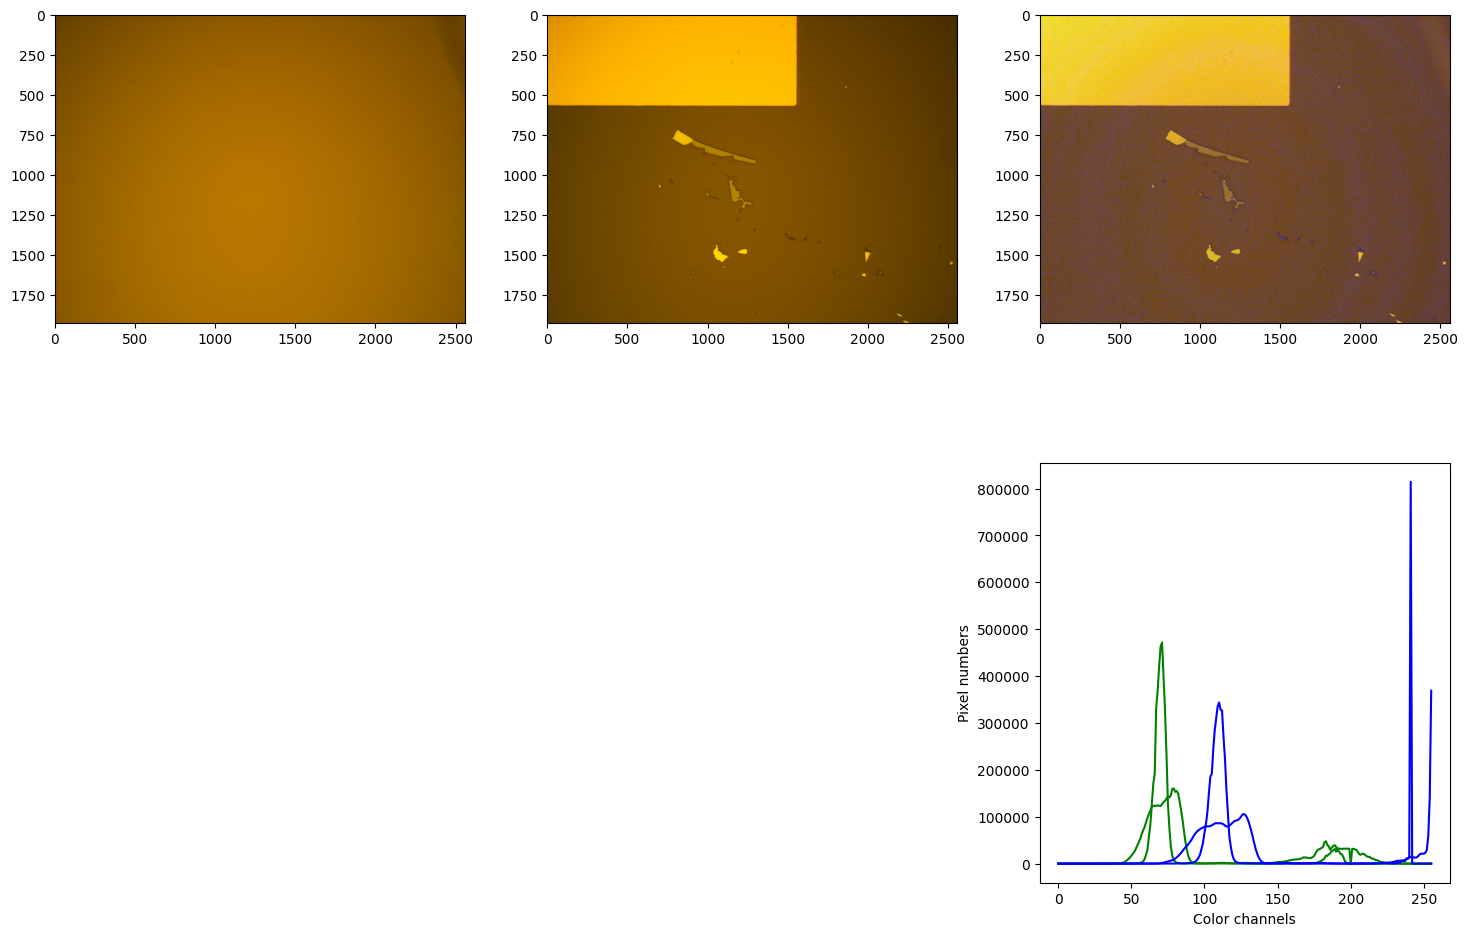

In [28]:
# import image

flatfield = cv2.imread(r'images/flatfield.jpg') 
# plt.imshow(cv2.cvtColor(flatfield, cv2.COLOR_BGR2RGB))

image = cv2.imread(r'Dataset/images/04x100.jpg')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def resize_to_match(image1, image2):
    # get resolution
    height1, width1 = image1.shape[:2]
    height2, width2 = image2.shape[:2]

    # compare resolution
    if (height1, width1) == (height2, width2):
        print("Resolution matched.")
        return image1, image2
    else:
        print("Resolution not match, resizing.")
        # resize
        resized_image2 = cv2.resize(image2, (width1, height1))
        return image1, resized_image2

image, flatfield = resize_to_match(image, flatfield)
image_novig = preprocessor_functions.remove_vignette(image, flatfield)
# plt.imshow(cv2.cvtColor(image_novig, cv2.COLOR_BGR2RGB))

# plot the histogram to show difference
# plt.subplot(131)
# plt.imshow(cv2.cvtColor(flatfield, cv2.COLOR_BGR2RGB))
# plt.subplot(132)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.subplot(133)
# plt.imshow(cv2.cvtColor(image_novig, cv2.COLOR_BGR2RGB))
fig1, ax1 = plt.subplots(2, 3, figsize=(18, 12))

ax1[0,0].imshow(cv2.cvtColor(flatfield, cv2.COLOR_BGR2RGB))
ax1[0,1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1[0,2].imshow(cv2.cvtColor(image_novig, cv2.COLOR_BGR2RGB))
ax1[1,0].axis('off')
ax1[1,1].axis('off')

# Spectral histogram
channels = (1,2)
colors = ('g', 'b')
for n, c in zip(channels, colors):
    hist_image, _ = np.histogram(image[:, :, n], bins=256, range=(0, 256))
    hist_image_novig, _ = np.histogram(image_novig[:, :, n], bins=256, range=(0, 256))
    ax1[1, 2].plot(hist_image, color=c)
    ax1[1, 2].plot(hist_image_novig, color=c)

ax1[1, 2].set_xlabel('Color channels')
ax1[1, 2].set_ylabel('Pixel numbers')


Analysis the contrast calculation.